# Base Ball Project

#### Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#### Output: Number of predicted wins (W)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.sample(5)            # Randomly getting the 5 rows of the dataset :

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90


In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.shape

(30, 17)

### About the columns :

* 'W' - ("Wins")- It is the number of Predicted Wins.


* 'R' - ("Runs") - A player is awarded a run if he crosses the plate to score his team a run. 


* 'AB' - ("At Bats") - an at bat (AB) or time at bat is a batter's turn batting against a pitcher.


* 'H' - ("Hits") -  A hit occurs when a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice.


* '2B' - ("Doubles") - A batter is credited with a double when he hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.


* '3B' - ("Triples") - a triple occurs when a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.


* 'HR' - ("HomeRun") -  A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.


* 'BB' - ("Walks") - A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter.


* 'SO' - (StrikeOuts) - A strikeout occurs when a pitcher throws any combination of three swinging or looking strikes to a hitter.


* 'SB' - ("StolenBases") - A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled.


* 'RA' - ("RunsAllowed") - Runs Allowed is the amount of runs that score against a pitcher. This includes earned runs and unearned runs.


* 'ER' - ("EarnedRuns") - An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball.


* 'ERA' - ("EarnedRunsAverage") - Earned run average represents the number of earned runs a pitcher allows per nine innings -- with earned runs being any runs that scored without the aid of an error or a passed ball. ERA is the most commonly accepted statistical tool for evaluating pitchers.


* 'CG' - ("CompleteGames") - In baseball, a complete game (CG) is the act of a pitcher pitching an entire game without the benefit of a relief pitcher.


* 'SHO' - ("Shoutouts") -  A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score.


* 'SV" - ("Saves") -  A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances. 


* 'E'- ("Errors") - An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

In [6]:
# Checking Null Values in the dataframe :

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

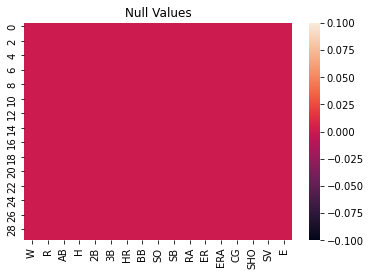

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

* We conclude that there are no null values present in the dataset :

In [9]:
# Checking the Data type of the columns :

df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [11]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


## EDA

* Data Visualization

<AxesSubplot:xlabel='R', ylabel='W'>

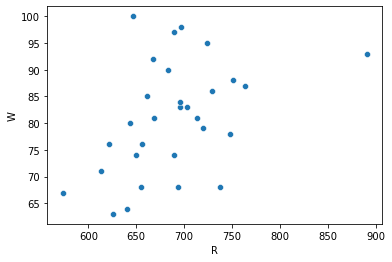

In [13]:
sns.scatterplot(x = "R", y = "W", data = df)

* We see that runs ("R") i.e "Runs" have the positive correlation with the target variable wins ("W").

<AxesSubplot:xlabel='AB', ylabel='W'>

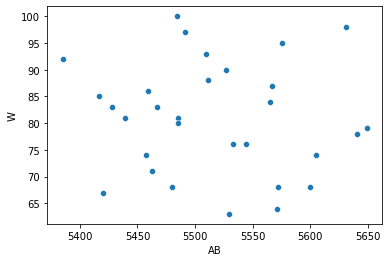

In [14]:
sns.scatterplot(x= "AB", y = "W", data = df)

* We don't see any clear correlation between the target and feature (AB, At Bats)

<AxesSubplot:xlabel='H', ylabel='W'>

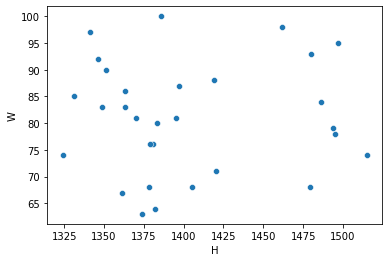

In [15]:
sns.scatterplot(x= "H", y = "W", data = df)

* We do not see clear relationship between the two:

<AxesSubplot:xlabel='2B', ylabel='W'>

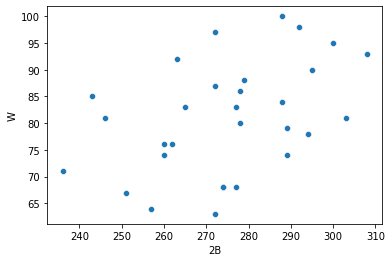

In [16]:
sns.scatterplot(x="2B", y = "W", data =df)

* We observe a positive correlation between the "2B" i.e Doubles and "Wins" i.e W, as doubles increases chance of wining increases.

<AxesSubplot:xlabel='3B', ylabel='W'>

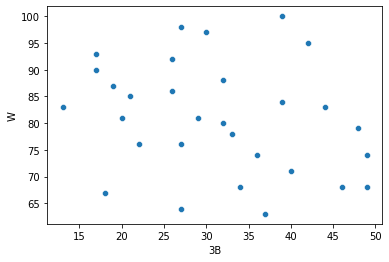

In [17]:
sns.scatterplot(x= "3B", y = "W", data =df)

* We see no correlation between the "W" i.e Wins and "3B" i.e Triples:

<AxesSubplot:xlabel='HR', ylabel='W'>

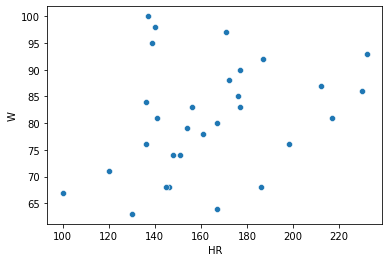

In [18]:
sns.scatterplot(x= "HR", y = "W", data = df)

* We observe a positive correlation between (HR - HomeRuns) & (W-wins):

<AxesSubplot:xlabel='BB', ylabel='W'>

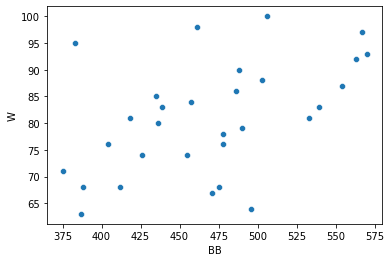

In [19]:
sns.scatterplot(x="BB", y ="W", data = df)

* We see a postive correlation between the two, as "BB", i.e walks increase chance of winning increase.

<AxesSubplot:xlabel='SO', ylabel='W'>

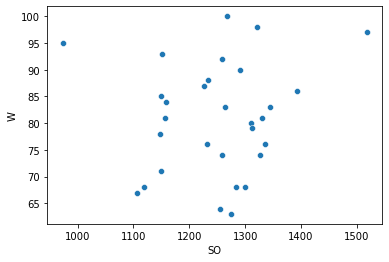

In [20]:
sns.scatterplot(x= "SO", y = "W", data = df)

*  We See Positive correlation between "SO", strikeouts and chance of winning

<AxesSubplot:xlabel='SB', ylabel='W'>

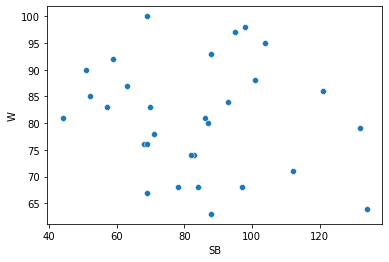

In [21]:
sns.scatterplot(x= "SB", y = "W", data = df)

* We do not see clear correlation between "SB", StolenBases and "W" our label chances of winnning

<AxesSubplot:xlabel='RA', ylabel='W'>

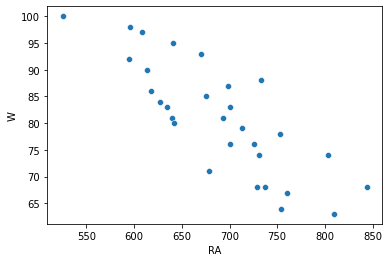

In [22]:
sns.scatterplot(x= "RA", y = "W", data = df)

* We see strong negative correlation between "RA", runs allowed and chance of winning "W".

<AxesSubplot:xlabel='ER', ylabel='W'>

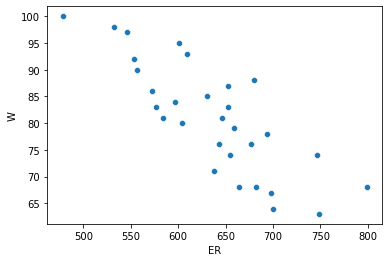

In [23]:
sns.scatterplot(x= "ER", y = "W", data = df)

* We see a clear negative relationship between "ER", earned runs and "W" i.e chances of winning :

<AxesSubplot:xlabel='ERA', ylabel='W'>

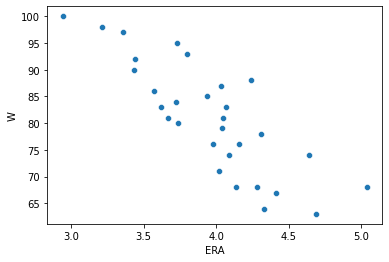

In [24]:
sns.scatterplot(x= "ERA", y = "W", data = df)

* We see a clear negative relationship between "ERA", earned runs average and "W" i.e chances of winning.

<AxesSubplot:xlabel='CG', ylabel='W'>

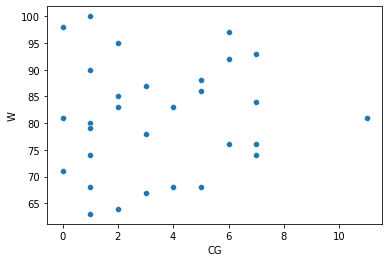

In [25]:
sns.scatterplot(x= "CG", y = "W", data = df)

* We do not see any clear pattern in "CG", complete games and "W" i.e chances of winning :

<AxesSubplot:xlabel='SHO', ylabel='W'>

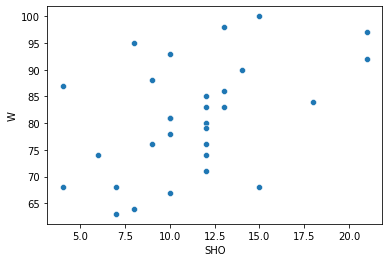

In [26]:
sns.scatterplot(x= "SHO", y = "W", data = df)

* We observe a positive correlationship between "SHO", shoutouts and chance of winning.

<AxesSubplot:xlabel='SV', ylabel='W'>

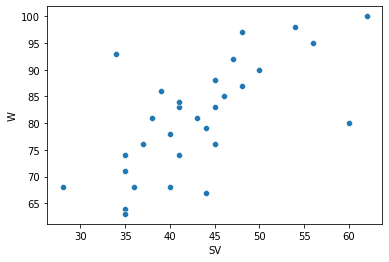

In [27]:
sns.scatterplot(x= "SV", y = "W", data = df)

* We See a good positice correlation between "SV" saves & "W" chances of winning as saves increase chance of winning increase

<AxesSubplot:xlabel='E', ylabel='W'>

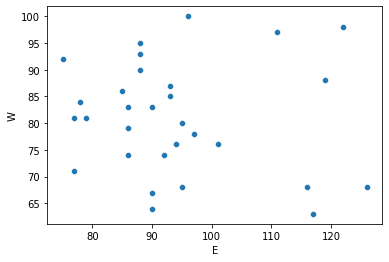

In [28]:
sns.scatterplot(x= "E", y = "W", data = df)

* We do not see any clear relationship between "E", errors and "W"

<AxesSubplot:xlabel='R', ylabel='W'>

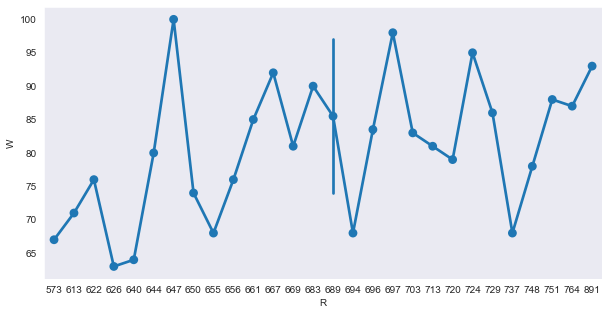

In [29]:
plt.figure(figsize=(10,5))
sns.set_style("dark")
sns.pointplot(x="R",y="W",data=df)

#### * From the above chart we saw that there is no particular relation between runs and wins but when the runs are 644-647 the teams wins the highest match

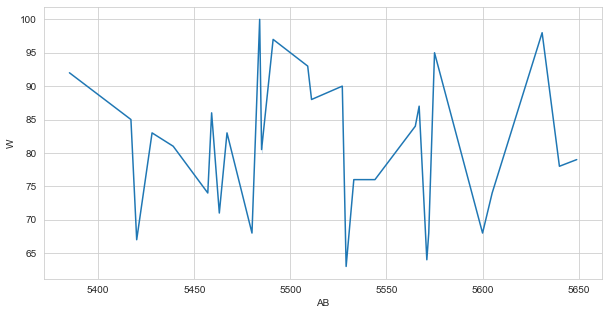

In [30]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.lineplot(x="AB",y="W",data=df)
plt.show()

#### * From the above chart we can say after seen the above chart that when the teams time of the bat is between 5475-5500 teams are wins the more matches

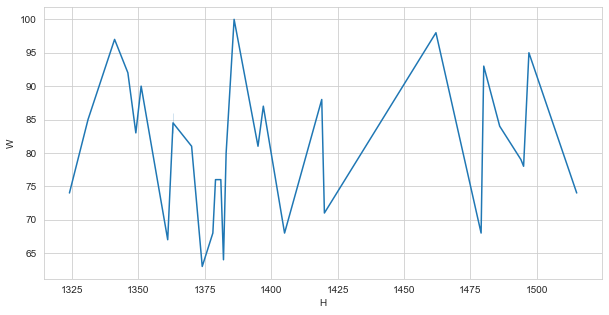

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(x="H",y="W",data=df)
plt.show()

#### * From the above chart we conclude that when the batter safely reaches or passes first base after hitting the ball(HIts) between 1380-1390 the teams wins frequently

<AxesSubplot:xlabel='2B', ylabel='W'>

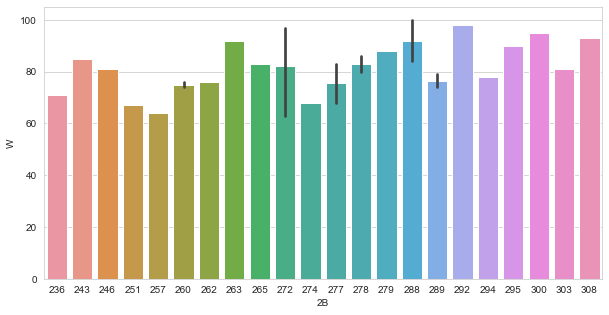

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x="2B",y="W",data=df)

#### * Here we can see that when the batter get the run on double base ,which is between 263-300 the team wins ratio almost 85%

<AxesSubplot:xlabel='3B', ylabel='W'>

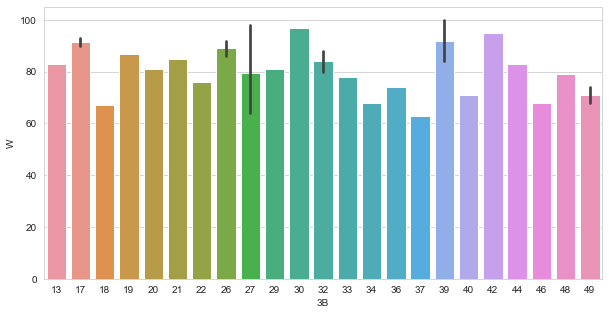

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x="3B",y="W",data=df)

#### * From the above if the batter get the triple run ,which is between 263-300 the team wins ratio almost 80%

<AxesSubplot:xlabel='HR', ylabel='W'>

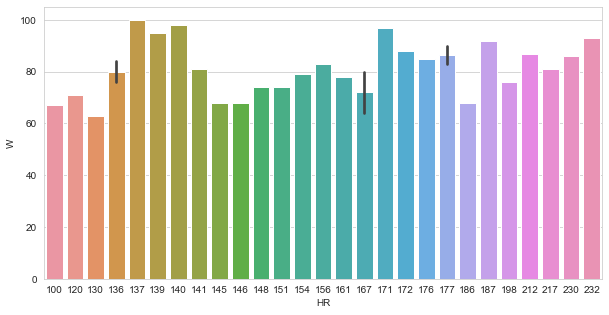

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x="HR",y="W",data=df)

#### * From the above chart we conclude that when the batter reach home safely more than 170tym teams are wining maximunm time

<AxesSubplot:xlabel='BB', ylabel='W'>

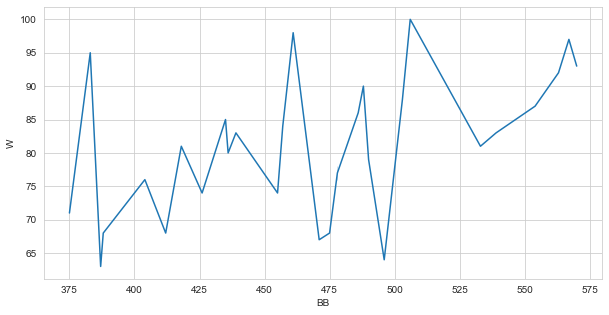

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(x="BB",y="W",data=df)

#### * Here we conclude that when the walks are more the chances of winning increases

<AxesSubplot:xlabel='SO', ylabel='W'>

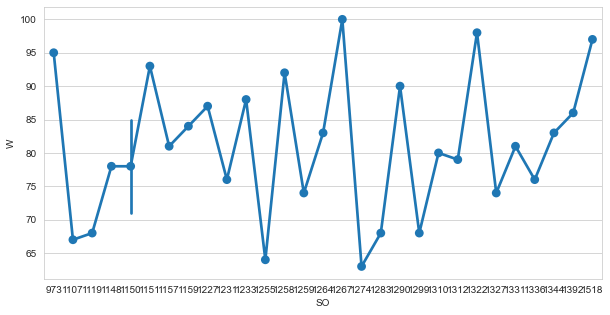

In [36]:
plt.figure(figsize=(10,5))
sns.pointplot(x="SO",y="W",data=df)

#### * Here we can see that when the strikeouts are high, teams wining chances are also high 

<AxesSubplot:xlabel='SB', ylabel='W'>

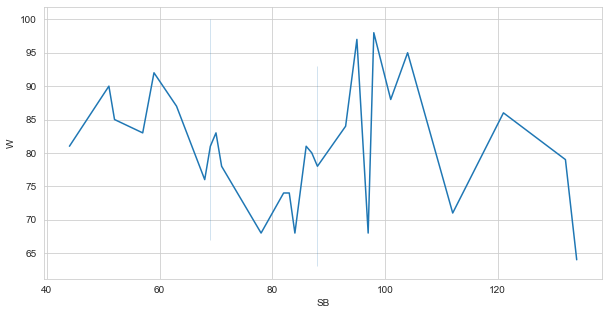

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x="SB",y="W",data=df)

#### * From the above graph we conclude that when the Stolen Bases is crossing 120 times then the team is loosing the match continuously

<AxesSubplot:xlabel='RA', ylabel='W'>

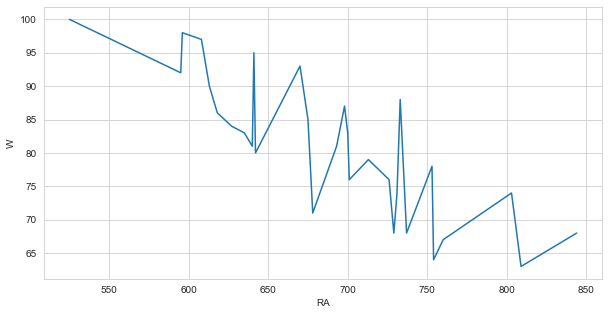

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x="RA",y="W",data=df)

#### * Here also when the Runs Allowed is crossing a particular range(above 800) the team is loosing the matches

<AxesSubplot:xlabel='ER', ylabel='W'>

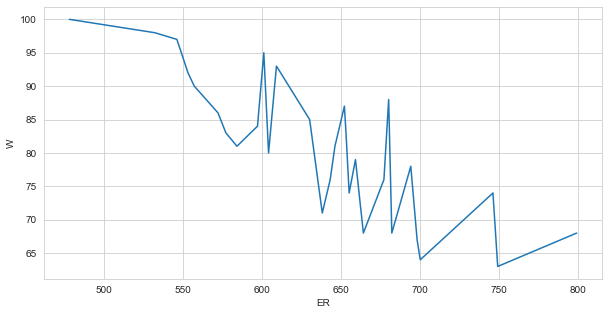

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(x="ER",y="W",data=df)

#### * From the above we can say as the Earned against Pitcher increases the chances of wining decrease drastically. 

<AxesSubplot:xlabel='CG', ylabel='W'>

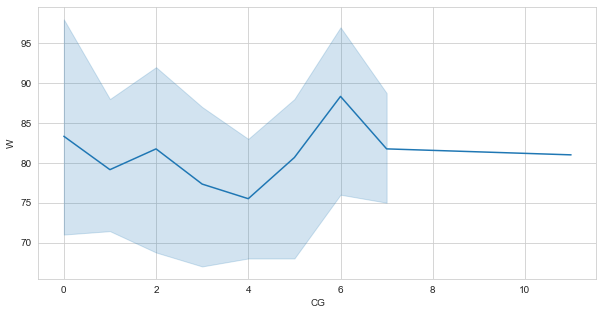

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(x="CG",y="W",data=df)

#### * Here we can see that when Earned Run Average is crossing 4 then team is wining the matches so we conclude that Earned Run Average 4 is good

<AxesSubplot:xlabel='SHO', ylabel='W'>

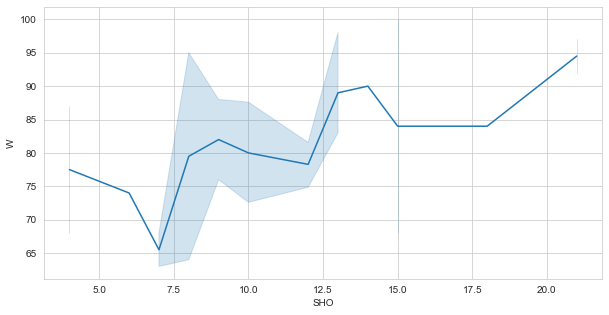

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(x="SHO",y="W",data=df)

#### * We can see from above chart that when the team Shutouts is crossing a particular point(17.5) the team is winnig the match continuously

<AxesSubplot:xlabel='SV', ylabel='W'>

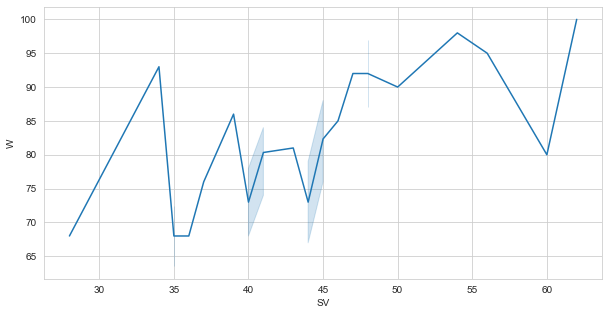

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(x="SV",y="W",data=df)

#### * From the above chart we can say that when the pitchers saves the runs 60 or more then the team is wining the match continuously

<AxesSubplot:xlabel='E', ylabel='W'>

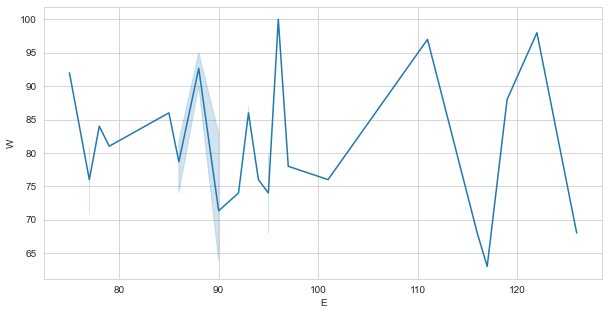

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(x="E",y="W",data=df)

#### * From the above chart we can say that when the team is making more error they are loosing the more number of matches.

## Multivariate analysis

### Correlation :

In [44]:
df.drop(columns = ['W'], axis = 1).corrwith(df.W)

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

In [45]:
# Visualizing the correlation using HeatMap :

<AxesSubplot:title={'center':'Correlation with W'}>

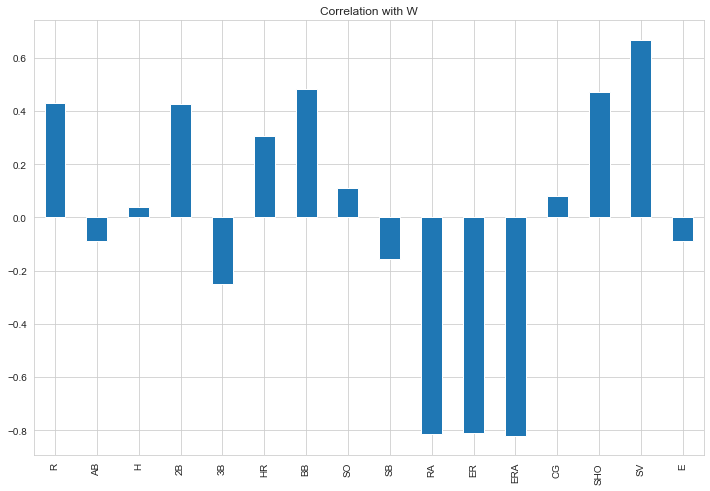

In [46]:
df.drop(columns = ['W'], axis = 1).corrwith(df.W).plot(kind = 'bar', grid = True, figsize = (12,8),
                                                     title = "Correlation with W")

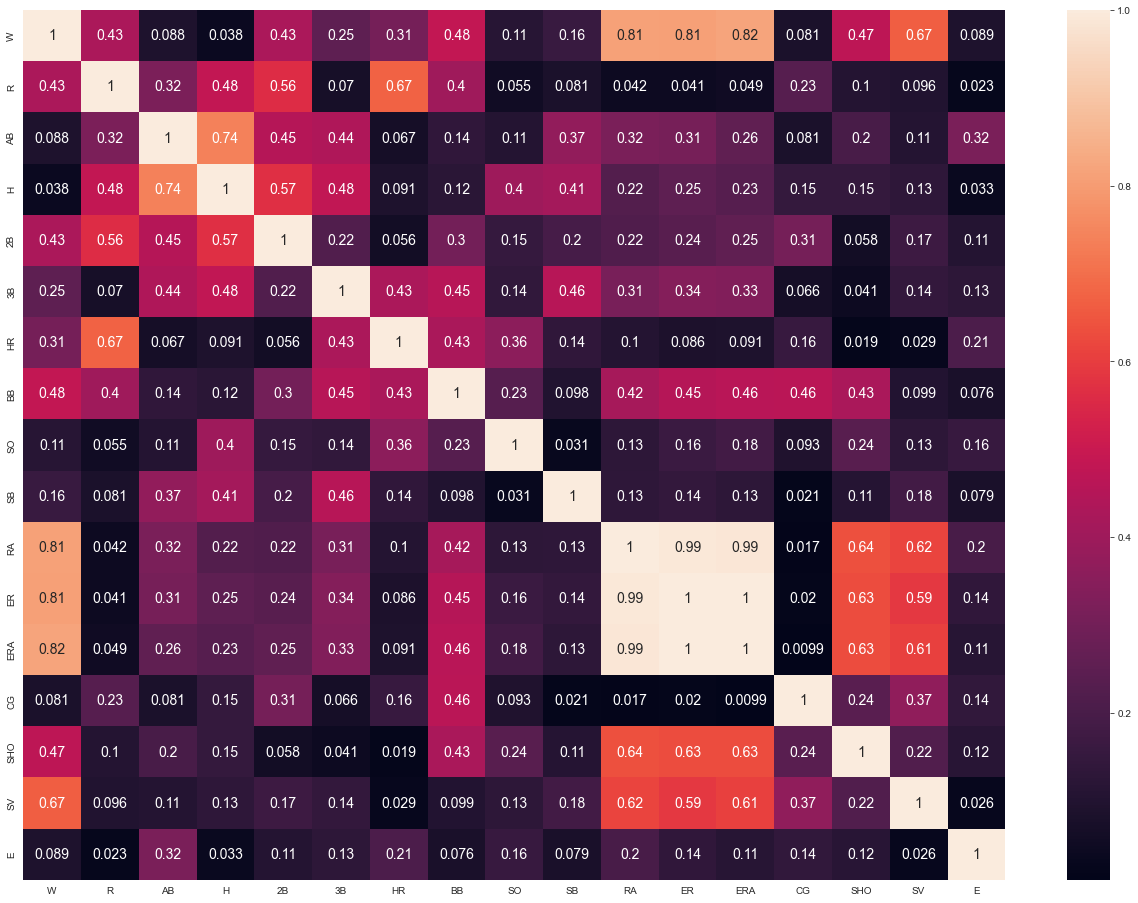

In [47]:
df_corr = df.corr().abs()
plt.figure(figsize = (22,16))
sns.heatmap(df_corr, annot = True, annot_kws = {'size' :14})
plt.show()

### Outcomes Of Correlation :

* From the above we observe that :
* SV, SHO, CG, SO, BB, HR, 2B, H, R are positively correlated with the target variable "w".
* E, ERA, ER, RA, SB, 3B, AB are negatively correlated with the target variable "w".
* RA, ER, ERA are highly negatively correlated with the target, we have also observed this above in the scatter plot, Hence we should get rid of these columns and delete these columns.
* Rest of the columns are moderately related with the "W" and are within the acceptable range.

### Outlier Detection :

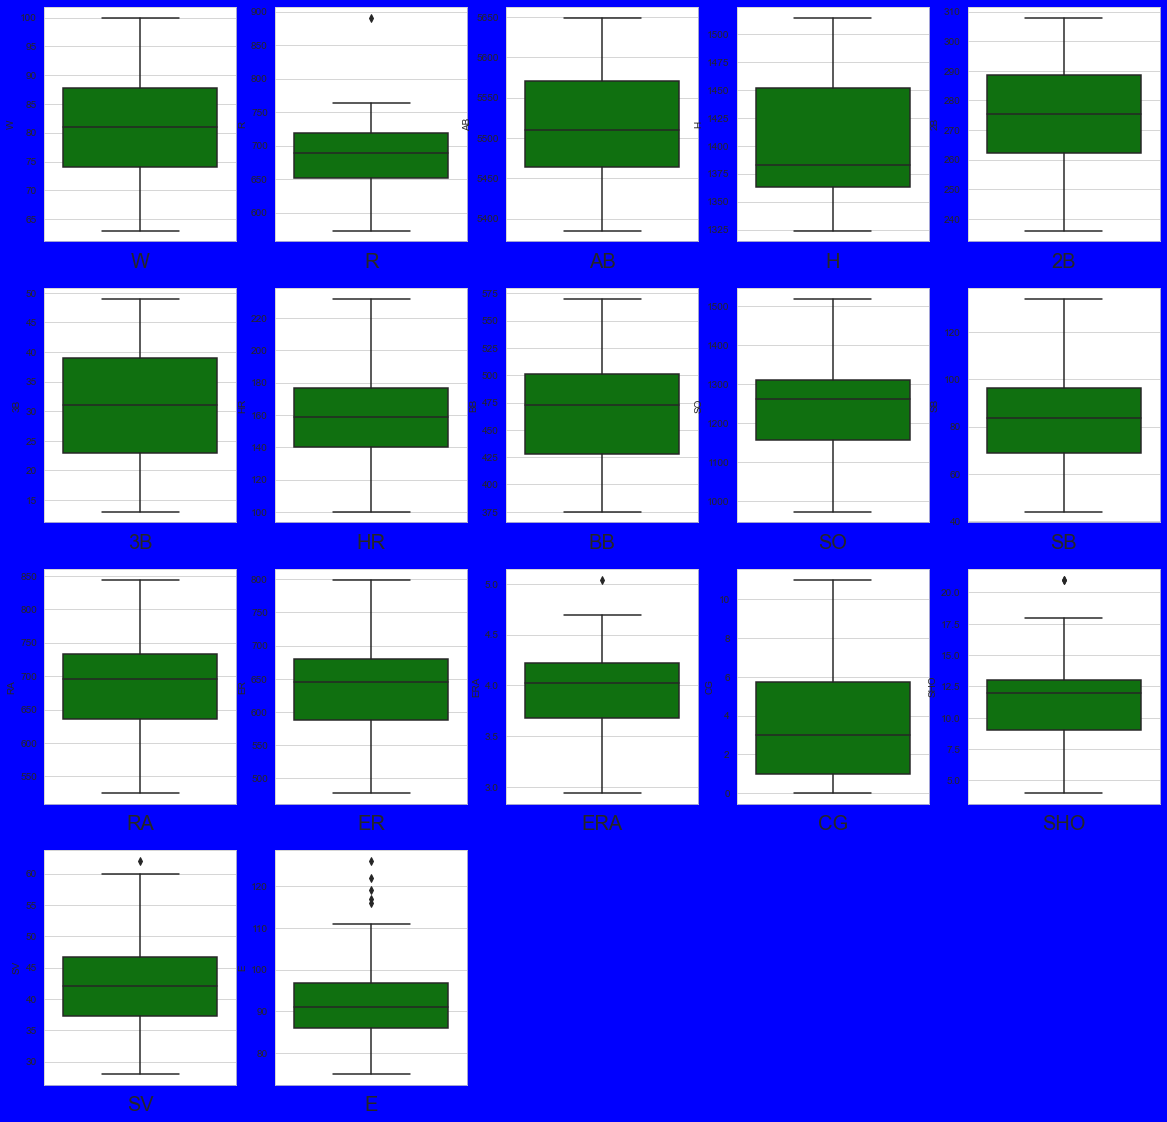

In [48]:
# using box plot to see outliers in the dataset:

plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=19:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=df[column],orient='v',color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Outlier Removal

In [49]:
# for removing outliers:

from scipy.stats import zscore

z_score=zscore(df[["R","ERA","SHO","SV","E"]])
ab=np.abs(z_score)
filtered=((ab<3).all(axis=1))
new_df = df[filtered]
new_df.shape

(29, 17)

In [50]:
print(" Data loss is : ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

 Data loss is :  3.3333333333333335


In [51]:
# for removing outliers:

data= new_df[new_df["SHO"]< new_df["SHO"].quantile(0.99)]

data= new_df[new_df["E"]< new_df["E"].quantile(0.97)]
data= new_df[new_df["SV"]< new_df["SV"].quantile(0.96)]

In [52]:
data.shape

(27, 17)

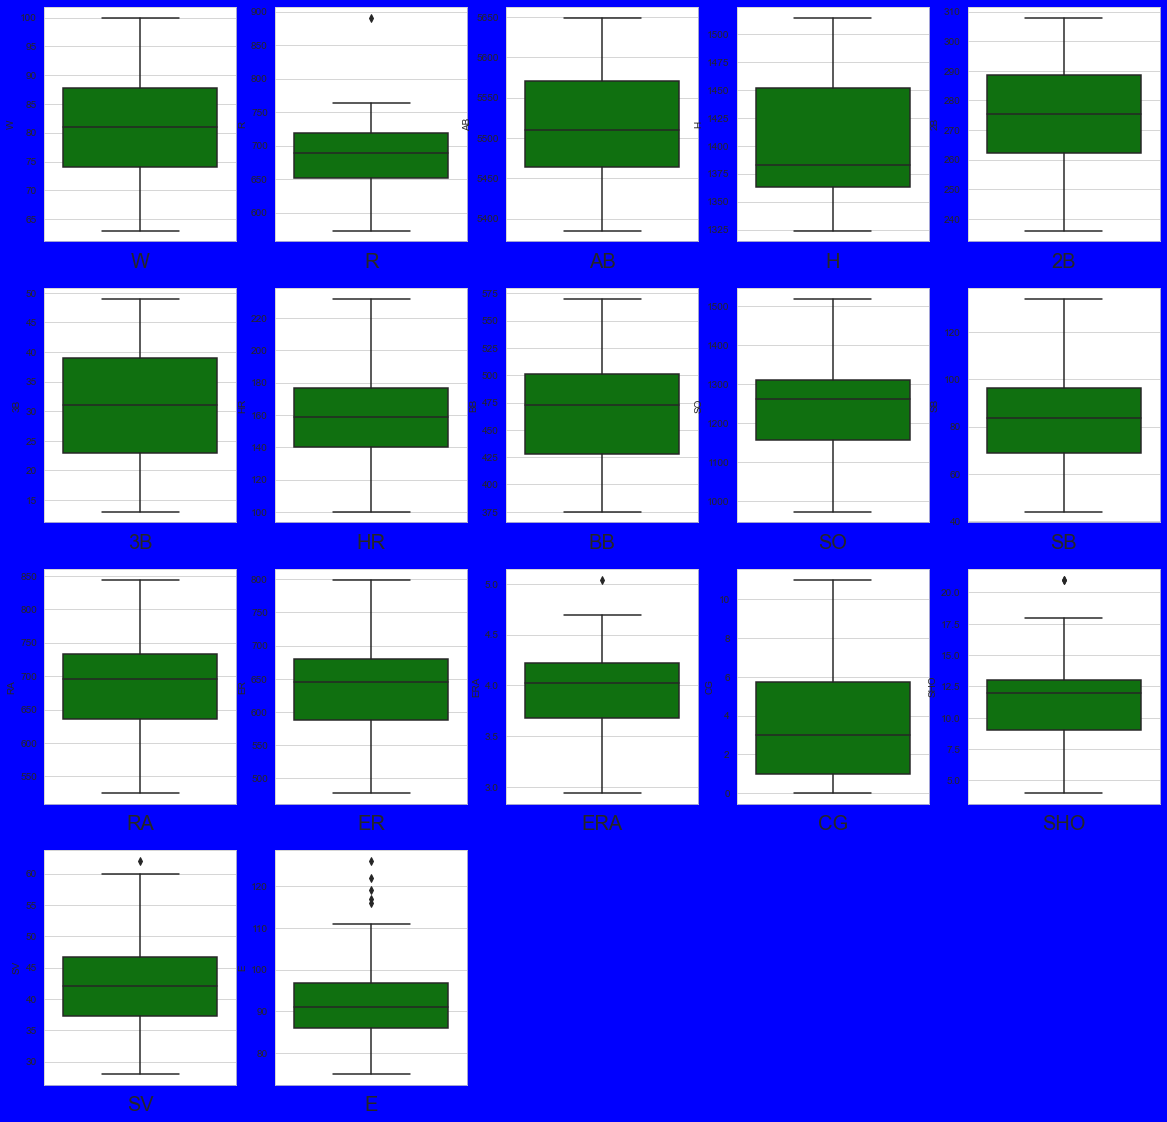

In [53]:
# using box plot to check once again if outliers are present in the dataset:

plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=19:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=df[column],orient='v',color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### * We observe that the outliers are removed from the dataset

### Checking skewness in the dataset :

In [54]:
data.skew()

W      0.067216
R     -0.372171
AB     0.070822
H      0.701246
2B    -0.234676
3B     0.160811
HR     0.401983
BB     0.166958
SO    -0.155054
SB     0.445608
RA     0.248827
ER     0.252056
ERA    0.237337
CG     0.750727
SHO    0.628940
SV     0.148113
E      0.830160
dtype: float64

### Skewness Removal :

In [55]:
features=["R","HR","CG","SHO","SV","E"]

In [56]:
# for removing skewness we will use PowerTransformer:

from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [57]:
data[features]=scale.fit_transform(data[features].values)
data[features].head()

,R,HR,CG,SHO,SV,E
0,0.891664,-0.748675,-0.404476,-0.721304,2.155533,-0.309452
1,0.210289,-0.134274,-0.404476,0.288372,0.489302,-0.497662
2,-0.395936,-0.673543,2.046164,-0.190205,-0.641217,-1.271069
3,-1.338234,-0.862917,1.215594,-0.448190,-0.808082,0.656743
4,0.048412,-0.309504,1.215594,0.288372,-1.146308,-0.497662


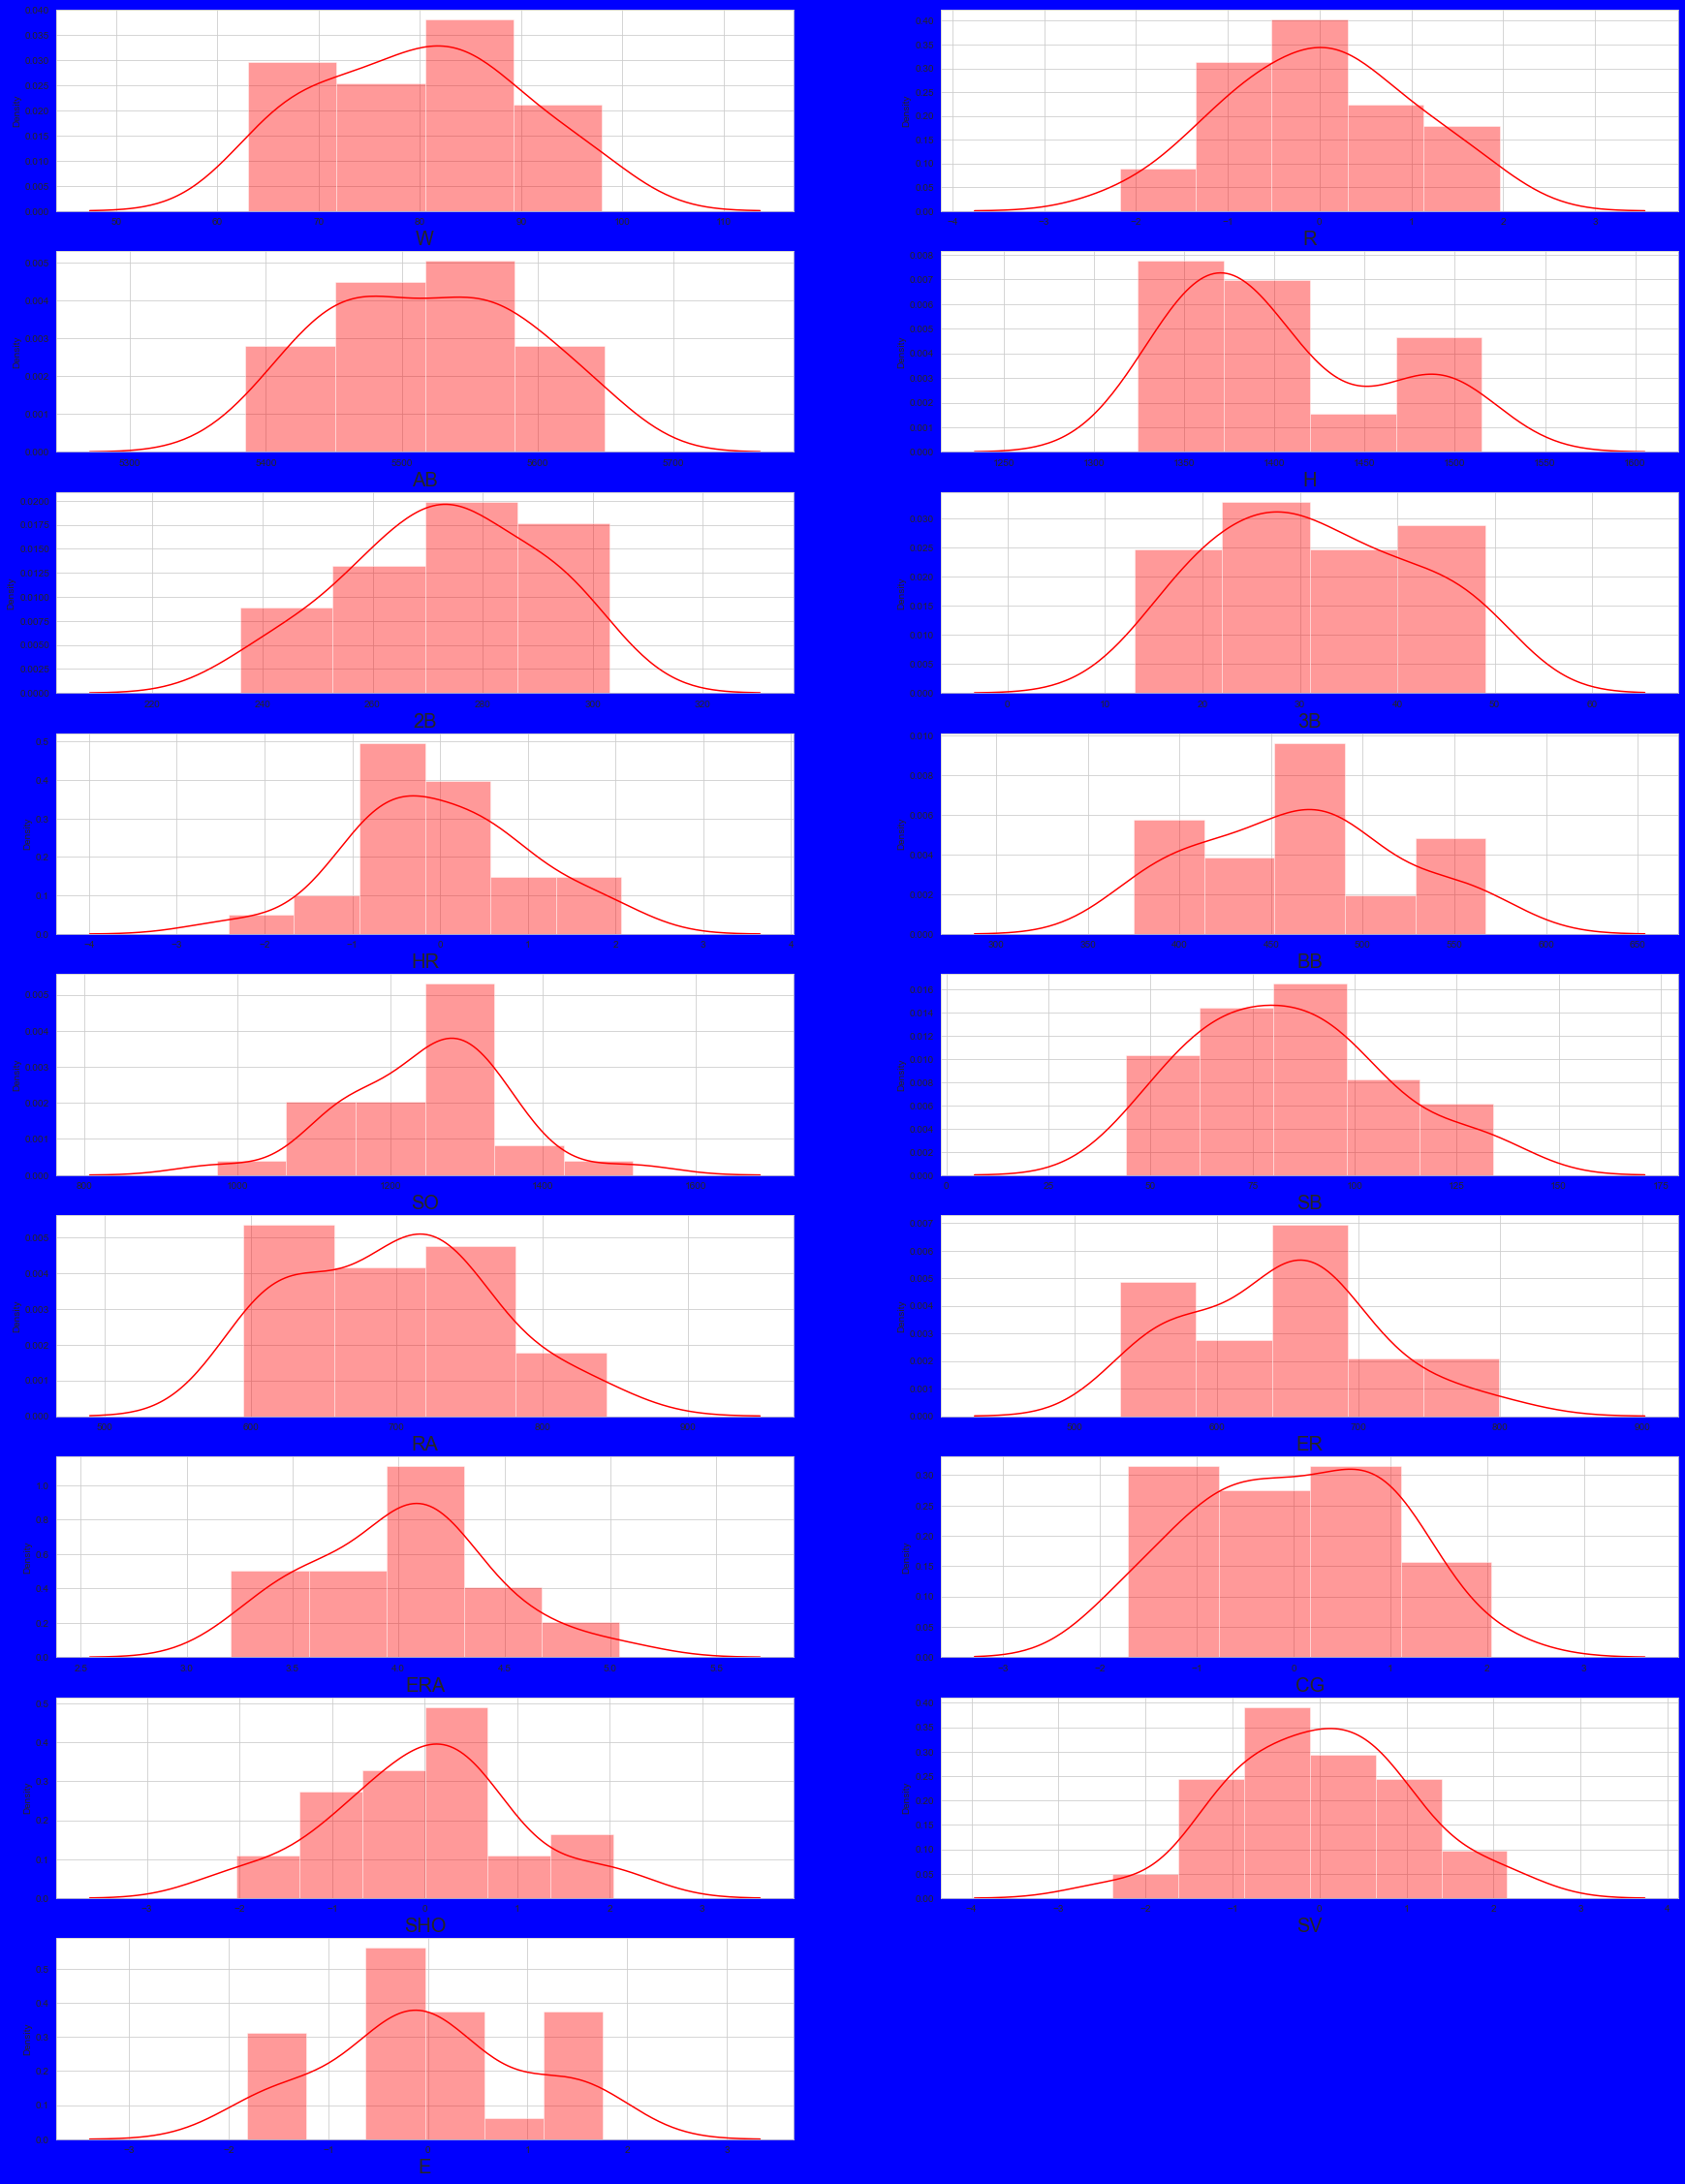

In [58]:
# using dist plot to see skewness once again : 
plt.figure(figsize=(30,45),facecolor='blue')
plotnumber = 1
for column in data:
    if plotnumber<=19:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [59]:
data.skew()

W      0.067216
R     -0.037877
AB     0.070822
H      0.701246
2B    -0.234676
3B     0.160811
HR    -0.000817
BB     0.166958
SO    -0.155054
SB     0.445608
RA     0.248827
ER     0.252056
ERA    0.237337
CG    -0.070116
SHO   -0.000971
SV    -0.001549
E      0.087949
dtype: float64

#### * We observe that the skewness is removed after using the Power Transformer

#### Splitting the dataset into features and target

In [60]:
x_new=data.drop("W",axis=1)
y_new=data["W"]

### Feature Selection :

In [61]:
#for selecting best column
from sklearn.feature_selection import chi2,SelectPercentile,f_classif
s=SelectPercentile(score_func=f_classif,percentile=70)
f_values=s.fit(x_new,y_new)

In [62]:
cols=s.get_support(indices=True)
features=x_new.columns[cols]

In [63]:
df_score=pd.DataFrame({"features":x_new.columns,"s_score":s.scores_})

In [64]:
df_score.sort_values(by="s_score",ascending=False)

,features,s_score
15,E,4.870742
8,SB,3.553558
0,R,2.444371
9,RA,2.149334
1,AB,1.752944
14,SV,1.669696
7,SO,1.646730
11,ERA,1.479357
10,ER,1.391160
13,SHO,1.017147


### Final splitting of dataset after feature selection :

In [65]:
x=data[["SB","E","R","RA","SV","AB", "BB"]]
y=data['W']

### Since our target is Continuous, it is a problem of Regression.

### Model Building :

In [66]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

In [67]:
# scaling the datset:

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [68]:
x_scaled.shape

(27, 7)

### Training the model

#### Finding the best Random State

In [69]:
lr = LinearRegression()

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size =0.20, random_state =i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train, pred_train)}" )
    print(f"At random state {i}, the testing accuracy is : {r2_score(y_test, pred_test)}" )
    print('\n')

At random state 0, the training accuracy is : 0.9332519713284715
At random state 0, the testing accuracy is : 0.6996559651361833


At random state 1, the training accuracy is : 0.9331221503014913
At random state 1, the testing accuracy is : 0.6764951388802718


At random state 2, the training accuracy is : 0.9010997262953165
At random state 2, the testing accuracy is : 0.8999328800897723


At random state 3, the training accuracy is : 0.9388637177115278
At random state 3, the testing accuracy is : 0.6878525004043883


At random state 4, the training accuracy is : 0.9412781060959869
At random state 4, the testing accuracy is : 0.5702573514395242


At random state 5, the training accuracy is : 0.9199809266987022
At random state 5, the testing accuracy is : 0.8697772428168248


At random state 6, the training accuracy is : 0.9296645157960277
At random state 6, the testing accuracy is : 0.5112319122607523


At random state 7, the training accuracy is : 0.919949306540575
At random state 7, 

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 70 )

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [72]:
# checking the shape of x_train, x_test, y_train, y_test, cv_x, cv_y

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21, 7), (6, 7), (21,), (6,))

In [73]:
def fun(instance, x_train, y_train, x_test, y_test):
    instances = instance.fit(x_train,y_train)
    train_pred = instances.predict(x_train)
    test_pred = instances.predict(x_test)
    print('r2_score', r2_score(y_test, test_pred))
    print('Mean squared error:',mean_squared_error(y_test,test_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, test_pred)))
    print('cross_val_score',cross_val_score(instances,x,y))
    print('cross_val_score Mean',cross_val_score(instances,x,y).mean())

### Linear Regression :

In [74]:
model1 = LinearRegression()
fun(model1, x_train, y_train, x_test, y_test)

r2_score 0.9145848690450827
Mean squared error: 7.964960961546038
Root mean squared error: 2.822226242090814
cross_val_score [0.46062711 0.46548784 0.8958703  0.91417266 0.92651634]
cross_val_score Mean 0.7325348509586243


### XGBoost

In [75]:
model2 = XGBRegressor()
fun(model2, x_train, y_train, x_test, y_test)

r2_score 0.7267833192301356
Mean squared error: 25.47745548178985
Root mean squared error: 5.047519735651347
cross_val_score [ 0.48122899 -2.09572432  0.56843453  0.8839826   0.6600744 ]
cross_val_score Mean 0.09959923917219234


### SVR

In [76]:
from sklearn.svm import SVR

model3 = SVR()

fun(model3, x_train,y_train, x_test, y_test)

r2_score 0.16327589221873917
Mean squared error: 78.02452305060257
Root mean squared error: 8.833149101572019
cross_val_score [-0.27352403 -0.58614605 -0.01645346 -0.37302684 -0.03522613]
cross_val_score Mean -0.25687530193274294


### AdaboostRegressor

In [77]:
from sklearn.ensemble import AdaBoostRegressor

model4 = AdaBoostRegressor()

fun(model4, x_train, y_train, x_test, y_test)

r2_score 0.6309283069796284
Mean squared error: 34.41593537414965
Root mean squared error: 5.866509641528738
cross_val_score [ 0.46587689 -0.07579825  0.71127409  0.74210218  0.68749918]
cross_val_score Mean 0.21129765309146897


### Bagging Regressor

In [78]:
from sklearn.ensemble import BaggingRegressor

model5 = BaggingRegressor()

fun(model5, x_train, y_train, x_test, y_test)

r2_score 0.7596067917783734
Mean squared error: 22.416666666666675
Root mean squared error: 4.734624237113931
cross_val_score [ 0.65053409 -0.75641176  0.53634549  0.78100624  0.58517099]
cross_val_score Mean 0.41123719058615915


### Ridge

In [79]:
model6 = Ridge()
fun(model6, x_train, y_train, x_test, y_test)

r2_score 0.9037032095014299
Mean squared error: 8.979675713991659
Root mean squared error: 2.9966107044445494
cross_val_score [0.52096899 0.40124147 0.88900735 0.915155   0.92819558]
cross_val_score Mean 0.7309136778231935


### Lasso

In [80]:
from sklearn.linear_model import Lasso
model7 = Lasso()
fun(model7, x_train, y_train, x_test, y_test)

r2_score 0.910935323864098
Mean squared error: 8.305281049672855
Root mean squared error: 2.8818884519829795
cross_val_score [ 0.68671668 -0.16484425  0.82157092  0.87894633  0.88710826]
cross_val_score Mean 0.621899587037861


#### * Based on above results of the various models, we observe that the is giving the best results, hence we choose Ridge as our model and tune the model for better results.

## Hyperparameter Tunning :

In [81]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

In [82]:
grid_params= {"alpha":[0,1,2,4],
              "random_state":[0,10,15,20,40],
              "fit_intercept":[True,False],
              "normalize":[True,False]
}

In [83]:
grid_search = GridSearchCV(estimator = model6,
                          param_grid = grid_params,
                          cv=5,n_jobs=-1)

In [84]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 4], 'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'random_state': [0, 10, 15, 20, 40]})

In [85]:
grid_search.best_params_

{'alpha': 0, 'fit_intercept': True, 'normalize': True, 'random_state': 0}

In [86]:
r=Ridge(alpha=1,fit_intercept=True,normalize=False,random_state=0)
r.fit(x_train,y_train)

Ridge(alpha=1, normalize=False, random_state=0)

In [87]:
y_pred=r.predict(x_test)

In [88]:
r2_score(y_test,y_pred)

0.9037032095014299

In [89]:
cross_val_score(r,x_scaled,y,cv=5).mean()

0.7421390610412428

#### * After Hyperparameter tunning the cv_score and r2_score has increased

### Saving the model

In [90]:
# Saving the model :

import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(model6,'Baseball.pkl')

['Baseball.pkl']

In [91]:
#saving the predicted as csv

joblib.dump(model6,'Baseball.csv')

['Baseball.csv']

In [92]:
#lets call the model and predict it
P=joblib.load('Baseball.csv')
P.predict(x_test)

array([77.25096555, 68.42746736, 94.25947322, 70.81111761, 81.68272995,
       73.54164478])